# Algoritmo Classificador utilizando Naive Bayes

Baseado no teorema de Bayes que considera a influência dos atributos com relação à classe de forma independente um do outro. 

In [78]:
# importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

In [79]:
# importando base de dados
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [80]:
# Visualizando a base de dados
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [81]:
# Separando previsores e classe
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [82]:
# Crianndo função para transformar atributos categóricos em numéricos

def transforma_atributos_numericos(previsores):
    labelencoder = LabelEncoder()
    
    for i in range(0, 20):
        if i == 0 or i == 2 or i == 3 or i == 5 or i == 6 or i == 8 or i == 9 or i == 11 or i == 13 or i == 14 or i == 16 or i == 18 or i == 19:
            previsores[:, i] = labelencoder.fit_transform(previsores[:, i])
                
    return previsores



In [83]:
previsores = transforma_atributos_numericos(previsores)
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [84]:
# Dividindo base entre treino e teste (70% treino e 30% teste)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [85]:
# Criando e treinando o modelo
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [86]:
# Prevendo os resultados
previsao = naive_bayes.predict(X_teste)
previsao

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [87]:
# Criando a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsao)
matriz_confusao



array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [88]:
# Calculando a acurácia
taxa_acerto = (accuracy_score(y_teste, previsao)) 
taxa_erro = (1 - taxa_acerto) 
print("A taxa de Acerto é: ", (taxa_acerto * 100), "%")
print("A taxa de Erro é: ", (taxa_erro * 100), "%")

A taxa de Acerto é:  71.0 %
A taxa de Erro é:  29.000000000000004 %


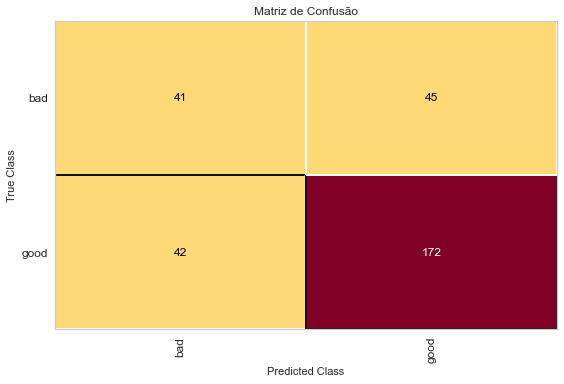

<AxesSubplot:title={'center':'Matriz de Confusão'}, xlabel='Predicted Class', ylabel='True Class'>

In [89]:
# Visualização da matriz de confusão de forma gráfica
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.title = 'Matriz de Confusão'
v.poof()

In [90]:
# Carregando novo cliente para teste
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito  = novo_credito.iloc[:, 0:20].values
novo_credito  = transforma_atributos_numericos(novo_credito)

In [91]:
# Prevendo o resultado
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')